In [1]:
from collections import namedtuple
import json

import numpy as np
import pandas as pd
import seaborn as sb

from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
sb.set(rc={'figure.figsize':(20,15)}, style="darkgrid")

In [3]:
hparm = namedtuple("hparm", ["lr", "update_rate", "batch_size", "buffer_size", "gamma", "tau", "times"])

path_prefix = "./hp_search_results/"

search_reference = { 
    1:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set1_results.json" ],
    2:  [hparm(5e-3, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set2_results.json" ],
    3:  [hparm(5e-2, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set3_results.json" ],
    4:  [hparm(5e-4, 8,  64,  int(1e5), 0.99, 1e-3, 10 ), "set4_results.json" ],
    5:  [hparm(5e-4, 16, 64,  int(1e5), 0.99, 1e-3, 10 ), "set5_results.json" ],
    6:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-2, 10 ), "set6_results.json" ],
    7:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 5e-2, 10 ), "set7_results.json" ],
    8:  [hparm(5e-5, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set8_results.json" ],
    9:  [hparm(5e-4, 4,  64,  int(1e4), 0.99, 1e-3, 10 ), "set9_results.json" ],
    10: [hparm(5e-4, 4,  64,  int(1e3), 0.99, 1e-3, 10 ), "set10_results.json"],
    11: [hparm(5e-4, 4,  32,  int(1e5), 0.99, 1e-3, 10 ), "set11_results.json"],
    12: [hparm(5e-4, 4,  16,  int(1e5), 0.99, 1e-3, 10 ), "set12_results.json"],
    13: [hparm(5e-4, 4,  128, int(1e5), 0.99, 1e-3, 10 ), "set13_results.json"],
    14: [hparm(5e-4, 8,  64,  int(1e5), 0.99, 1e-3, 10 ), "set14_results.json"],
    15: [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-3, 100), "set15_results.json"],
    16: [hparm(5e-6, 4,  64,  int(1e5), 0.99, 1e-3, 100), "set16_results.json"]
}

In [4]:
experiments = {
    "learning_rate_change": [search_reference[x] for x in [1,2,3,8]],
    "update_rate_change": [search_reference[x] for x in [1,4,5]],
    "tau_change": [search_reference[x] for x in [1,6,7]],
    "memory_size_change": [search_reference[x] for x in [1,9,10]],
    "batch_size_change": [search_reference[x] for x in [1,11,12,13]],
    "normality_estimation": [search_reference[x] for x in [15, 16]]
}

In [5]:
lr_experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiments["learning_rate_change"]]

for exp_item in lr_experiment_data:
    df = exp_item[1].T
    df["step"] = df.index
    df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
    df["run_id"] = df["run_id"].astype(str).astype("int64")
    df["lr"] = exp_item[0].lr
    ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
    ma_score.columns = ["run_id", "step", "ma_score"]
    exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

lr_experiment_df = pd.concat([x[1] for x in lr_experiment_data])

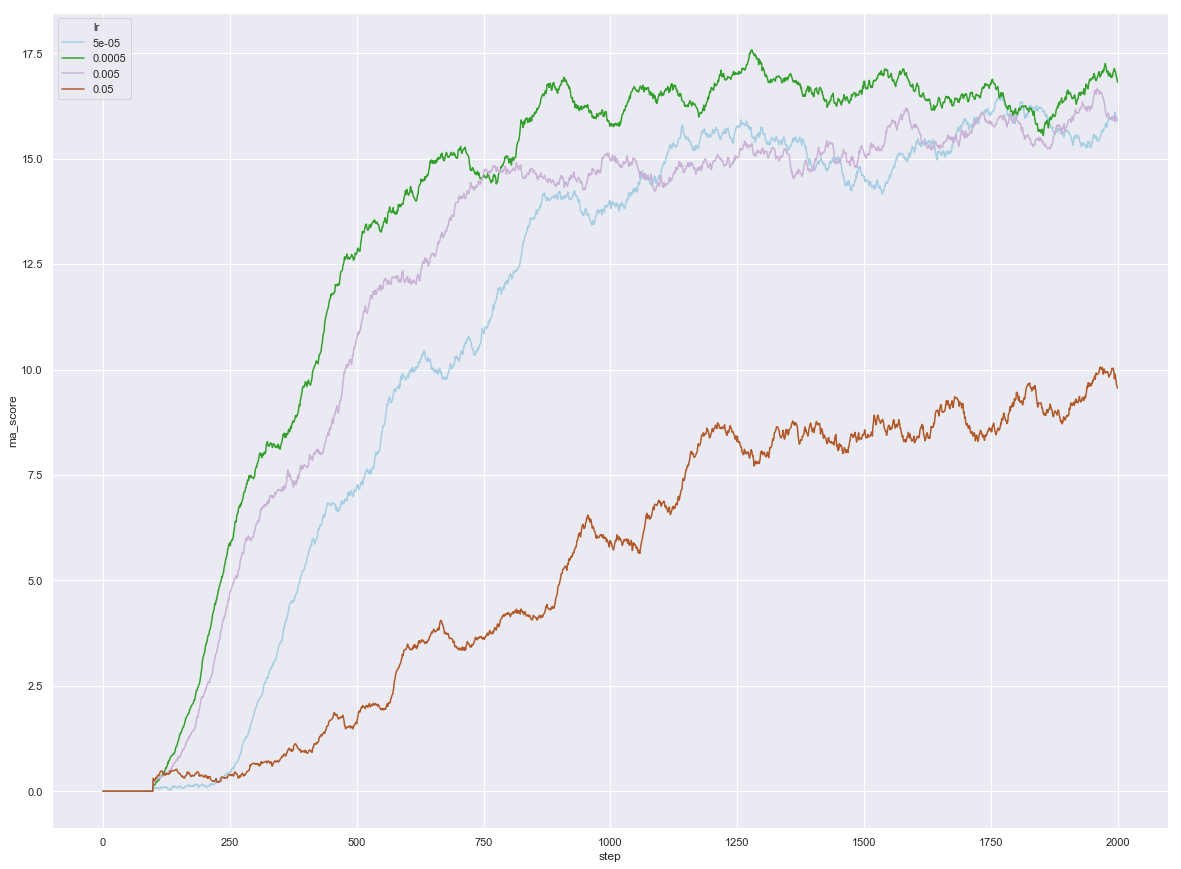

In [6]:
sb.lineplot(data = lr_experiment_df, x = 'step', y = 'ma_score', hue="lr", ci=0.9, legend="full", hue_norm=LogNorm(), palette="Paired")

In [7]:
ur_experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiments["update_rate_change"]]

for exp_item in ur_experiment_data:
    df = exp_item[1].T
    df["step"] = df.index
    df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
    df["run_id"] = df["run_id"].astype(str).astype("int64")
    df["update_rate"] = exp_item[0].update_rate
    ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
    ma_score.columns = ["run_id", "step", "ma_score"]
    exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

ur_experiment_df = pd.concat([x[1] for x in ur_experiment_data])

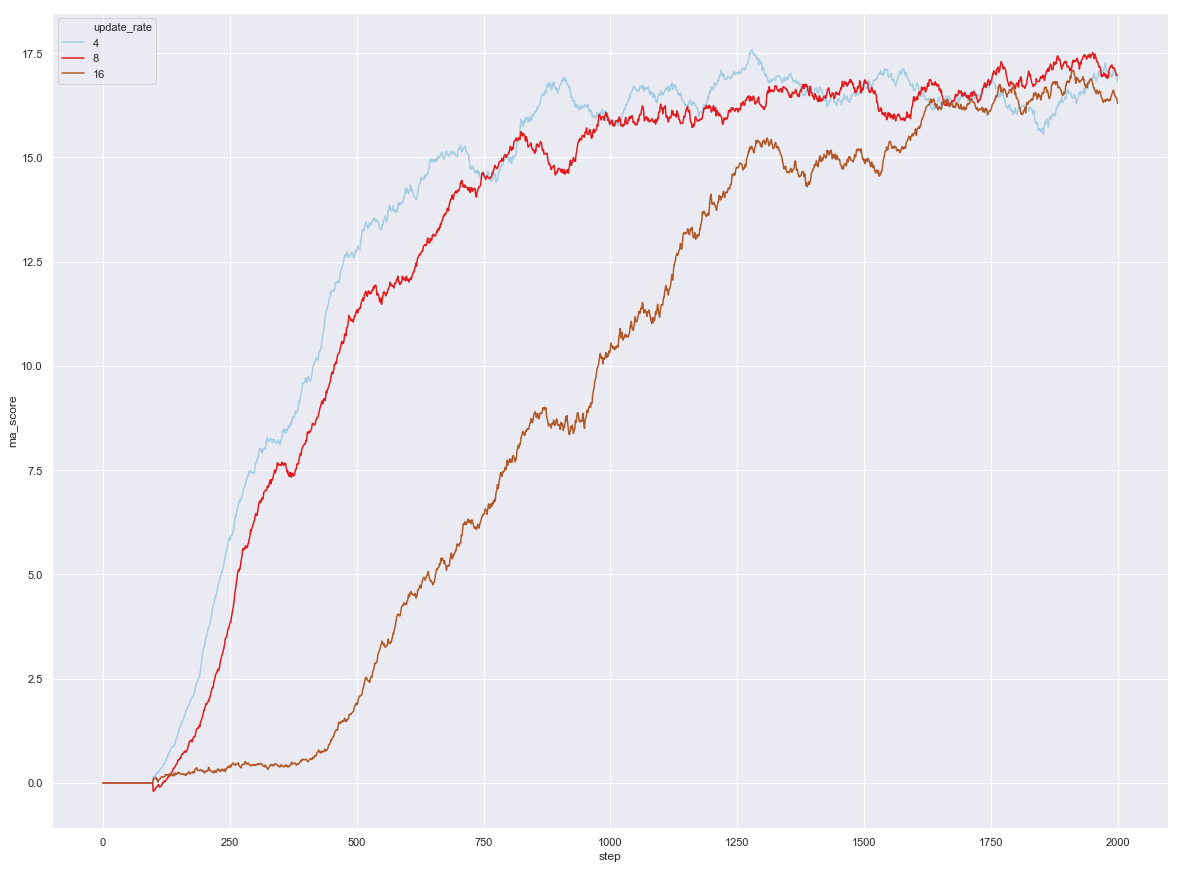

In [8]:
sb.lineplot(data = ur_experiment_df, x = 'step', y = 'ma_score', hue="update_rate", ci=0.9, legend="full", hue_norm=LogNorm(), palette="Paired")

In [9]:
tau_experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiments["tau_change"]]

for exp_item in tau_experiment_data:
    df = exp_item[1].T
    df["step"] = df.index
    df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
    df["run_id"] = df["run_id"].astype(str).astype("int64")
    df["tau"] = exp_item[0].tau
    ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
    ma_score.columns = ["run_id", "step", "ma_score"]
    exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

tau_experiment_df = pd.concat([x[1] for x in tau_experiment_data])

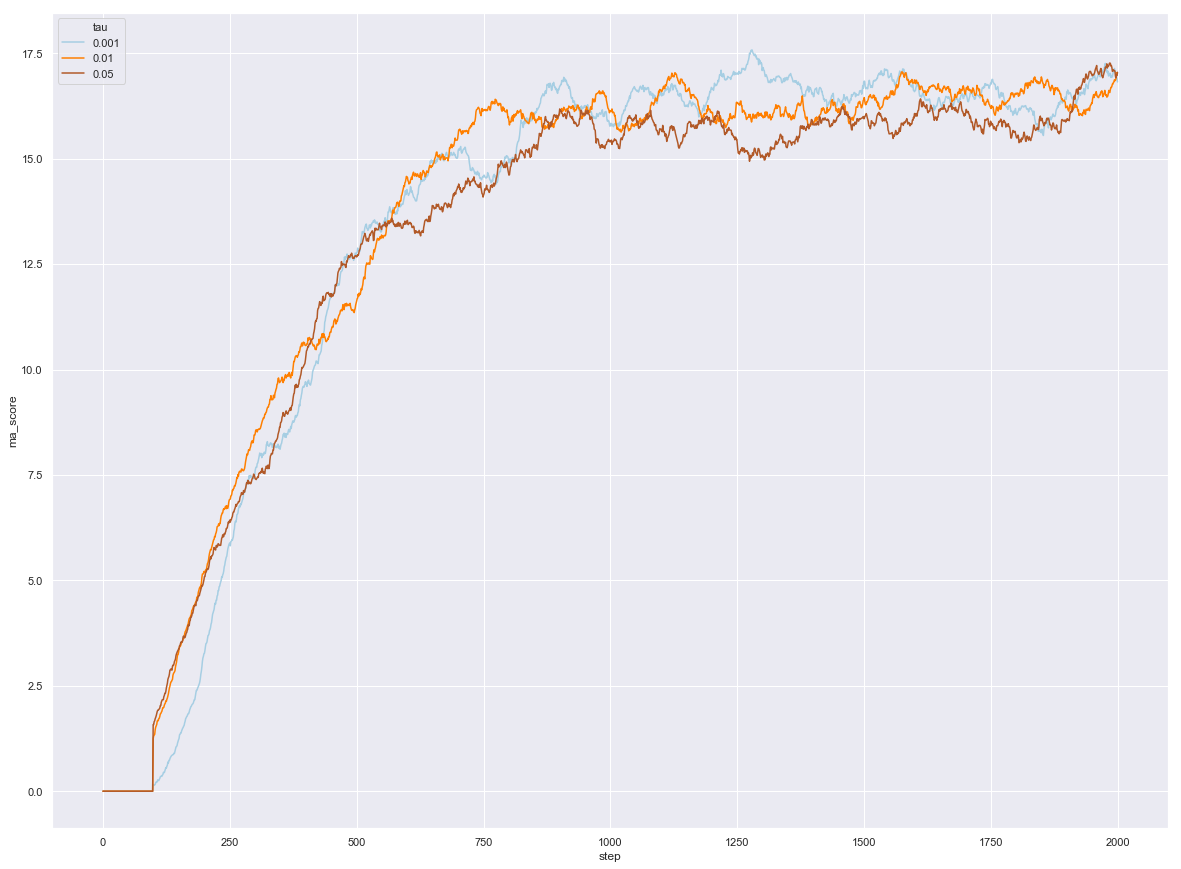

In [10]:
sb.lineplot(data = tau_experiment_df, x = 'step', y = 'ma_score', hue="tau", ci=0.9, legend="full", hue_norm=LogNorm(), palette="Paired")

In [11]:
ms_experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiments["memory_size_change"]]

for exp_item in ms_experiment_data:
    df = exp_item[1].T
    df["step"] = df.index
    df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
    df["run_id"] = df["run_id"].astype(str).astype("int64")
    df["memory_size"] = exp_item[0].buffer_size
    ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
    ma_score.columns = ["run_id", "step", "ma_score"]
    exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

ms_experiment_df = pd.concat([x[1] for x in ms_experiment_data])

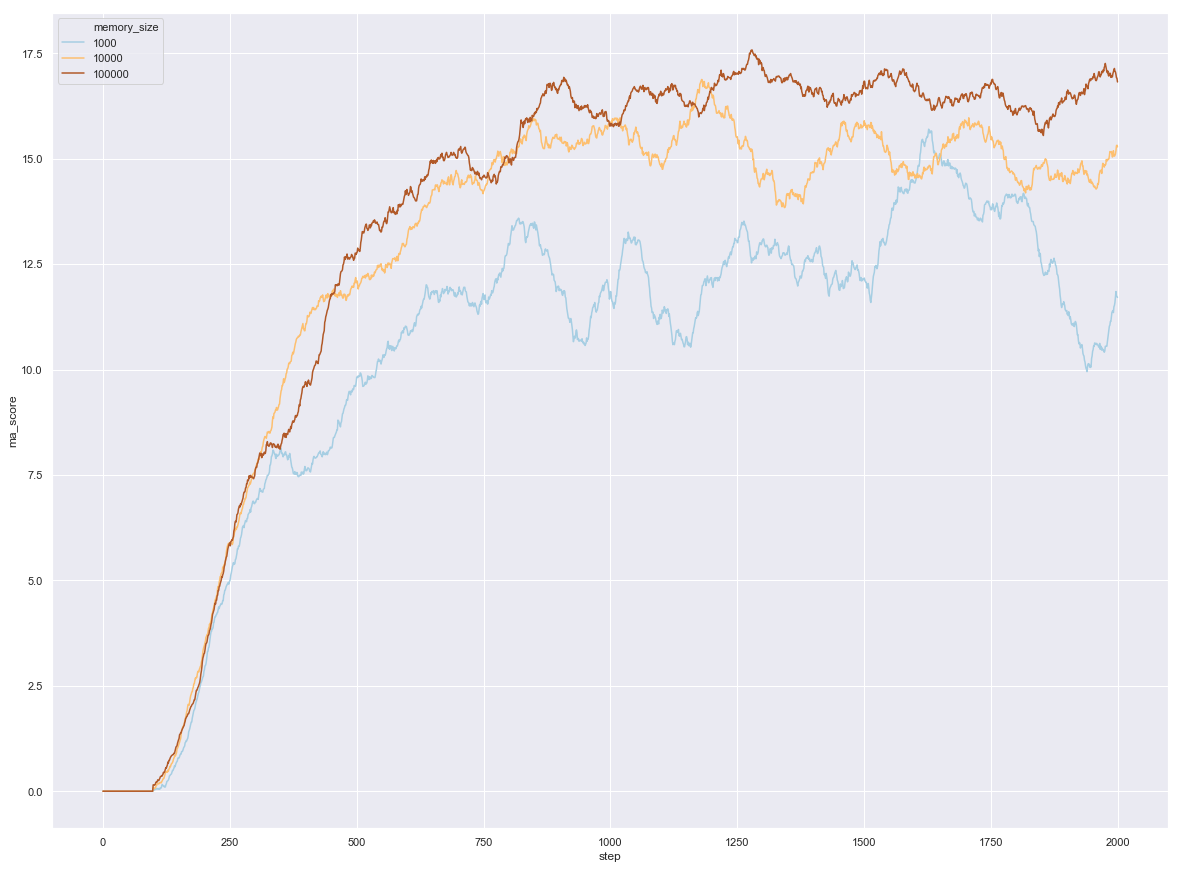

In [12]:
sb.lineplot(data = ms_experiment_df, x = 'step', y = 'ma_score', hue="memory_size", ci=0.9, legend="full", hue_norm=LogNorm(), palette="Paired")

In [13]:
bs_experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiments["batch_size_change"]]

for exp_item in bs_experiment_data:
    df = exp_item[1].T
    df["step"] = df.index
    df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
    df["run_id"] = df["run_id"].astype(str).astype("int64")
    df["batch_size"] = exp_item[0].batch_size
    ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
    ma_score.columns = ["run_id", "step", "ma_score"]
    exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

bs_experiment_df = pd.concat([x[1] for x in bs_experiment_data])

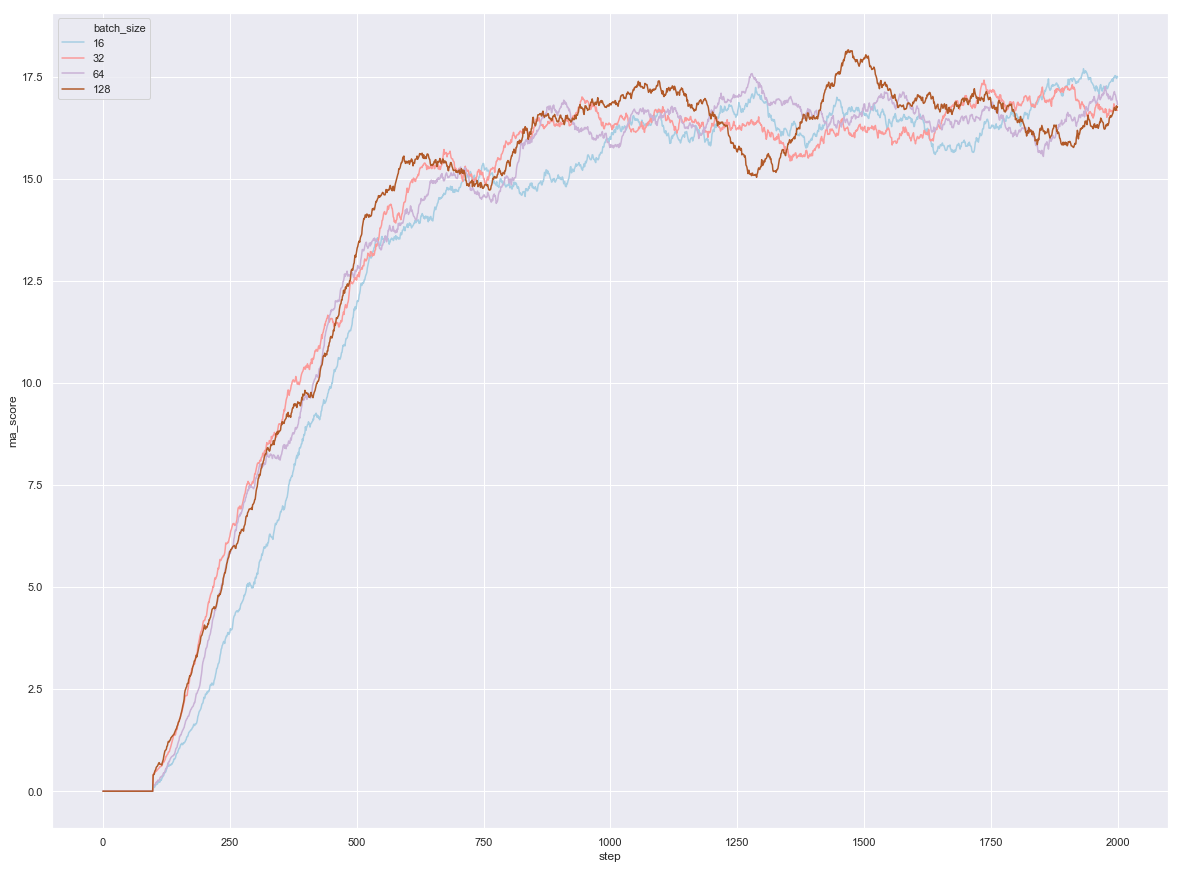

In [14]:
sb.lineplot(data = bs_experiment_df, x = 'step', y = 'ma_score', hue="batch_size", ci=0.9, legend="full", hue_norm=LogNorm(), palette="Paired")